# Import & Review Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
file = './data/trumptweets_20171130.csv'


In [70]:
I

trumptweets = pd.read_csv(file, encoding = 'latin1',
                          index_col='created_at')

In [5]:
trumptweets.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
1/31/2018 2:00,Twitter for iPhone,Join me live for the #SOTUhttps://t.co/0SLktWxfHi,22023,109076,False,9.585200e+17
1/29/2018 20:12,Twitter for iPhone,Congratulations to America?s new Secretary of ...,16431,84209,False,9.580700e+17
1/28/2018 13:18,Twitter for iPhone,Our economy is better than it has been in many...,42337,199787,False,9.576040e+17
1/28/2018 13:18,Twitter for iPhone,Somebody please inform Jay-Z that because of m...,64122,240489,False,9.576040e+17
1/28/2018 4:08,Twitter for iPhone,Democrats are not interested in Border Safety ...,35964,157413,False,9.574650e+17


# Prepare Data for Analysis

In [71]:
#Cast index of created_at dates to datetime format

trumptweets.index = pd.to_datetime(trumptweets.index)

In [72]:
#add new column for HOUR when the tweet occurred

trumptweets.loc[:, 'tweet_hour'] = trumptweets.index.hour

In [25]:
# Convert Source column to dummy variables

#map source twitter for iphone, Media Studio, Twitter for iPad to integers

trumptweets.loc[:, 'source_num'] = trumptweets.loc[:,'source'].map({'Twitter for iPhone':0,
                                                                    'Media Studio':1,
                                                                    'Twitter for iPad':2})

In [26]:
trumptweets.loc[:, 'source_num'].unique()

array([  0.,   1.,  nan,   2.])

In [80]:
#Convert Source_num to dummy variables

dummy_trumptweets = pd.get_dummies(trumptweets, columns=['source_num']).drop('source_num_0.0', axis=1)

ValueError: labels ['source_num'] not contained in axis

In [30]:
# Rename Dummy variable columns

dummy_trumptweets.rename(columns={'source_num_1.0': 'src_media_studio', 'source_num_2.0': 'src_iPad'}, inplace=True)

In [78]:
#Create new column, engagement, that summs retweet and favorite counts.  This will become my target y

dummy_trumptweets.loc[:, 'engagement'] = dummy_trumptweets.loc[:, 'retweet_count'] + dummy_trumptweets.loc[:, 'favorite_count']

In [79]:
# Do something with the tweet_hour column

# Analysis and Visualizations

In [33]:
#describe all

dummy_trumptweets.describe(include='all')

,source,text,retweet_count,favorite_count,is_retweet,id_str,tweet_hour,src_media_studio,src_iPad,engagement
count,354,354,354.000000,354.000000,354,3.540000e+02,354.000000,354.000000,354.000000,354.000000
unique,4,354,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,Twitter for iPhone,MAKE AMERICA GREAT AGAIN! https://t.co/64a93S07s7,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,342,1,NaN,NaN,309,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22238.658192,84830.822034,NaN,9.467647e+17,13.367232,0.028249,0.002825,107069.480226
std,NaN,NaN,10644.256542,47609.537109,NaN,6.635780e+15,6.838124,0.165917,0.053149,56148.286695
min,NaN,NaN,548.000000,0.000000,NaN,9.362040e+17,0.000000,0.000000,0.000000,2231.000000
25%,NaN,NaN,14968.500000,60390.000000,NaN,9.409112e+17,11.000000,0.000000,0.000000,74120.250000
50%,NaN,NaN,21203.500000,86368.000000,NaN,9.464155e+17,13.000000,0.000000,0.000000,105185.500000
75%,NaN,NaN,27441.500000,114225.250000,NaN,9.530670e+17,20.000000,0.000000,0.000000,141564.750000


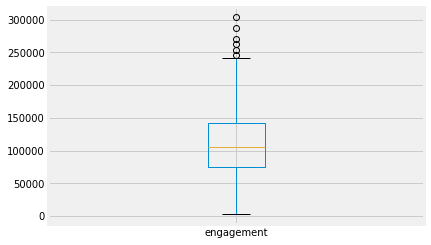

In [83]:
#boxplot of favorite_count

dummy_trumptweets.loc[:,'engagement'].plot(kind='box')

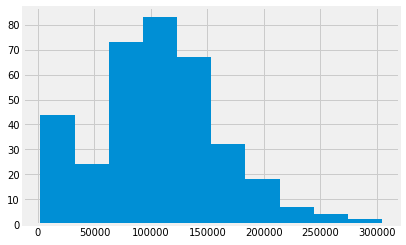

In [84]:
#Histogram of favorite count

dummy_trumptweets.loc[:, 'engagement'].hist(bins=10)

In [76]:
feature_cols = ['is_retweet', 
                'tweet_hour', 
                'src_media_studio', 
                'src_iPad']

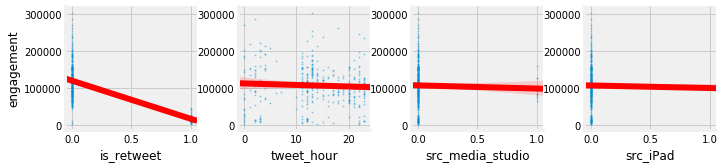

In [85]:
sns.pairplot(dummy_trumptweets,
            x_vars=feature_cols,
            y_vars='engagement',
            kind='reg',
            plot_kws={'scatter_kws': {'s':1, 'alpha':.3},
                      'line_kws': {'color':'red'}
                     }
            );

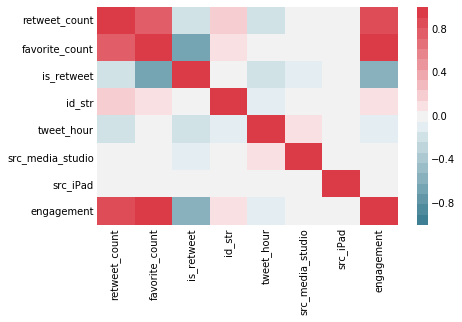

In [36]:
#Insert Correlation Matrix with HeatMap

sns.heatmap(dummy_trumptweets.corr(),
            vmin=-1,
            vmax = 1,
            cmap = sns.diverging_palette(220, 10, n=21),
            );

# Linear Regression

In [81]:
#Create new column, engagement, that summs retweet and favorite counts.  This will become my target y

dummy_trumptweets.loc[:, 'engagement'] = dummy_trumptweets.loc[:, 'retweet_count'] + dummy_trumptweets.loc[:, 'favorite_count']

In [38]:
feature_cols = ['is_retweet', 
                'tweet_hour', 
                'src_media_studio', 
                'src_iPad']

In [39]:
X = dummy_trumptweets.loc[:, feature_cols]
y = dummy_trumptweets.loc[:, 'engagement']


In [43]:
#Split Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [66]:
# model on the training set of data

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# predict on the test set for X

y_pred = lr.predict(X_test)

In [68]:
# compare predicted results against the test set

#print(metrics.mean_squared_error(y_train, lr.predict(X_train)))

print(metrics.mean_squared_error(y_test, y_pred))

1679432079.63


In [69]:
#Create Benchmark of Mean Values

y_pred_null = np.ones(y_test.shape) * y_train.mean()

#compare y_test against the y_means
metrics.mean_squared_error(y_test, y_pred_null)

3437618590.9426737

In [50]:
print(lr.intercept_)
print(lr.coef_)

144792.909895
[-110207.9049182    -1782.19546684  -16701.10877159  -10872.19602465]
